# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Прероцессинг-данных" data-toc-modified-id="Прероцессинг-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Прероцессинг данных</a></div><div class="lev2 toc-item"><a href="#Чистка" data-toc-modified-id="Чистка-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чистка</a></div><div class="lev2 toc-item"><a href="#Топ-путей" data-toc-modified-id="Топ-путей-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Топ путей</a></div><div class="lev1 toc-item"><a href="#Альфа-Алгоритм" data-toc-modified-id="Альфа-Алгоритм-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Альфа Алгоритм</a></div><div class="lev2 toc-item"><a href="#40%-Кейсов" data-toc-modified-id="40%-Кейсов-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>40% Кейсов</a></div><div class="lev2 toc-item"><a href="#Распределеий-цепочек" data-toc-modified-id="Распределеий-цепочек-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределеий цепочек</a></div><div class="lev2 toc-item"><a href="#Топ-цепочек" data-toc-modified-id="Топ-цепочек-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Топ цепочек</a></div><div class="lev1 toc-item"><a href="#Hypotheses" data-toc-modified-id="Hypotheses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypotheses</a></div><div class="lev2 toc-item"><a href="#Casuality-prediction" data-toc-modified-id="Casuality-prediction-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Casuality prediction</a></div><div class="lev3 toc-item"><a href="#Причинные-связи" data-toc-modified-id="Причинные-связи-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Причинные связи</a></div><div class="lev3 toc-item"><a href="#Кластеризация" data-toc-modified-id="Кластеризация-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Кластеризация</a></div><div class="lev2 toc-item"><a href="#Embeddings" data-toc-modified-id="Embeddings-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Embeddings</a></div><div class="lev3 toc-item"><a href="#word2vec" data-toc-modified-id="word2vec-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>word2vec</a></div><div class="lev3 toc-item"><a href="#doc2vec" data-toc-modified-id="doc2vec-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>doc2vec</a></div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Прероцессинг данных

## Чистка

Убираем кейсы, в которых только одно событие

In [66]:
data = pd.read_csv("data/pwc_data_merge/final.csv")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [517]:
case_ids = np.unique(data["CASE"])

In [460]:
cases_num = case_ids.size

In [461]:
from tqdm import tqdm_notebook

In [467]:
simple_cases = []
good_cases = data.copy() 
for case_id in tqdm_notebook(case_ids, desc="cases"):
    events = data[data["CASE"] == case_id]
    if events.shape[0] == 1:
        good_cases.drop(events.index, inplace=True)
        simple_cases.append(events.index[0])

In [469]:
good_cases.shape

(31751, 53)

In [470]:
data.shape

(31968, 53)

In [471]:
case_ids = np.unique(good_cases["CASE"])

In [472]:
shuffle = np.random.shuffle

In [473]:
shuffle(case_ids)

In [474]:
cases_num = case_ids.size
print("Cases number:", cases_num)

train_cases_ids = case_ids[: int(cases_num * 0.8)]
test_cases_ids = case_ids[int(cases_num * 0.8):]

Cases number: 4791


In [475]:
good_cases.set_index("CASE", inplace=True)

In [477]:
train = good_cases.loc[train_cases_ids]
test = good_cases.loc[test_cases_ids]
# simple_cases = data.loc[simple_cases]

In [478]:
train.shape

(25052, 52)

In [479]:
test.shape

(6699, 52)

In [480]:
good_cases.reset_index(inplace=True)
test.reset_index(inplace=True)
train.reset_index(inplace=True)

In [85]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
simple_cases.to_csv("simple_cases.csv")

## Топ путей

In [333]:
from collections import Counter

In [529]:
data = pd.read_csv("data/train_test/train.csv")
data.sort_values(by="SYS DATE", inplace=True)

In [526]:
data = train

In [530]:
case_ids = np.unique(data["CASE"])

Для оптимальное работы с кейсами обозначим каждое событие буковой алфавита, а каждый кейс строкой из этих букв

In [531]:
events = np.unique(data["SIMPLIFIED EVENT"])
size = events.size
letters = [chr(i)  for i in range(ord("A"), ord("A") + 26)] + [chr(i) for i in range(ord("a"), ord("a") + size - 26)]
letter2event = dict(zip(letters, events))
event2letter = dict(zip(events, letters))

In [532]:
cases = []
for case_id in tqdm_notebook(case_ids, desc="cases"):
    events = list(data[data["CASE"] == case_id]["SIMPLIFIED EVENT"])
    events = "".join([event2letter[event] for event in events])
    cases.append((case_id, events))

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [533]:
path_counter = {}
for case in cases:
    events = case[1]
    case_id = case[0]
    if events in path_counter.keys():
        path_counter[events][0] += 1
        path_counter[events][1].append(case_id)
    else:
        path_counter[events] = [1, [case_id]]
path_counter = list(path_counter.items())

In [534]:
def get_beta_cases(path_counter, cases_num, beta=0.4):
    path_counter.sort(key=lambda x: x[1][0], reverse=True)
    cases = []
    paths = []
    betas = []
    cur_cases_num = 0
    for path in path_counter:
        if float(cur_cases_num) / cases_num >= beta:
            break
        cur_cases_num += path[1][0]
        cases = cases + path[1][1]
        paths.append(path[0])
        betas.append(float(cur_cases_num) / cases_num)
    return cases, paths, betas
    
cases_num = np.unique(data["CASE"]).size
beta_cases, paths, betas = get_beta_cases(path_counter, cases_num)    

In [535]:
paths

['YX',
 'OF',
 'UbB',
 'UBb',
 'OROF',
 'UBaW',
 'UaBW',
 'OSROF',
 'MOF',
 'UMcOF',
 'UbBMOF',
 'UaB',
 'UMcO']

In [536]:
for path in paths:
    events = list(path)
    for event in events:
        print(letter2event[event])
    print()
    print()

Purchase requisition item updated
Purchase requisition


Invoice Reciept
Clearing (Invoice)


Purchase order
RELEASED (5% delta possible)
Approved


Purchase order
Approved
RELEASED (5% delta possible)


Invoice Reciept
Invoice Reciept header updated
Invoice Reciept
Clearing (Invoice)


Purchase order
Approved
RELEASED (10% delta possible)
Purchase order item updated


Purchase order
RELEASED (10% delta possible)
Approved
Purchase order item updated


Invoice Reciept
Invoice Reciept item updated
Invoice Reciept header updated
Invoice Reciept
Clearing (Invoice)


Goods Reciept
Invoice Reciept
Clearing (Invoice)


Purchase order
Goods Reciept
Service Entry Sheet
Invoice Reciept
Clearing (Invoice)


Purchase order
RELEASED (5% delta possible)
Approved
Goods Reciept
Invoice Reciept
Clearing (Invoice)


Purchase order
RELEASED (10% delta possible)
Approved


Purchase order
Goods Reciept
Service Entry Sheet
Invoice Reciept




In [347]:
data.set_index("CASE", inplace=True)
log_for_alpha_algorithm = data.loc[beta_cases]
data.reset_index(inplace=True)

In [348]:
log_for_alpha_algorithm.to_csv("data/log_for_alpha_algorithm.csv")

# Альфа Алгоритм

In [381]:
import importlib as im
im.reload(processmining.preprocessing);
im.reload(processmining.miners);

In [382]:
import processmining
from processmining.preprocessing import *
from processmining.miners import *

## 40% Кейсов

In [383]:
dirty_log = Log.from_csv("data/train_test/train.csv", do_sort=True)

INFO:root:Reading...


In [89]:
log, paths, betas = prune(dirty_log, coef=0.4)
# log3 = pm.read_csv("data/log_for_alpha_algorithm.csv", event_atr_name="SIMPLIFIED EVENT")

INFO:root:Pruning...


In [31]:
clean(log, inplace=True);

INFO:root:Cleaning...


In [51]:
al = AlphaMiner()

In [52]:
al.apply(log)

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 8190 subset of 13 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


In [53]:
al.draw(output_file="purchase_process_model_40%_of_all_cases2")

## Распределеий цепочек

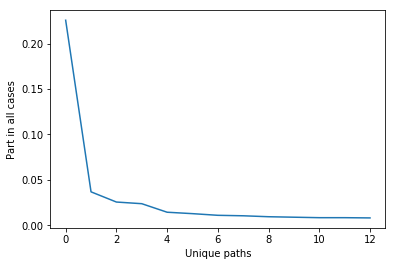

In [56]:
plt.plot(betas)
plt.xlabel("Unique paths")
plt.ylabel("Part in all cases")
plt.show()

In [90]:
path_counter = count_pathes(dirty_log)

In [93]:
path_counter = list(path_counter.items())

In [104]:
counts = [len(path[1]) for path in path_counter]

In [105]:
counts.sort(reverse=True)

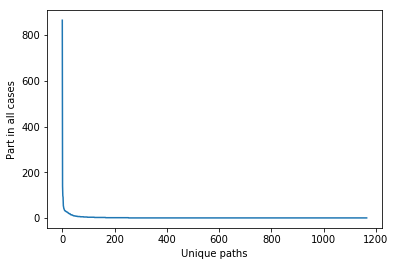

In [106]:
plt.plot(counts)
plt.xlabel("Unique paths")
plt.ylabel("Part in all cases")
plt.show()

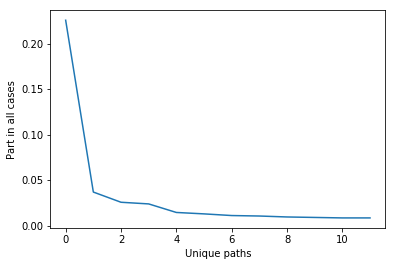

In [109]:
counts = np.array(counts)
counts = counts / sum(counts)
plt.plot(counts[:12])
plt.xlabel("Unique paths")
plt.ylabel("Part in all cases")
plt.show()

## Топ цепочек

In [386]:
al = AlphaMiner()

In [115]:
log, paths, betas = prune(Log.from_csv("data/train_test/train.csv", do_sort=True), top=2)

INFO:root:Reading...
INFO:root:Pruning...


In [119]:
al.apply(log)
al.draw(output_file="purchase_process_model_top2_cases")

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 14 subset of 4 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


In [120]:
log, paths, betas = prune(Log.from_csv("data/train_test/train.csv", do_sort=True), top=3)

INFO:root:Reading...
INFO:root:Pruning...


In [121]:
al.apply(log)
al.draw(output_file="purchase_process_model_top3_cases")

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 126 subset of 7 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


In [122]:
log, paths, betas = prune(Log.from_csv("data/train_test/train.csv", do_sort=True), top=4)

INFO:root:Reading...
INFO:root:Pruning...


In [123]:
al.apply(log)
al.draw(output_file="purchase_process_model_top4_cases")

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 126 subset of 7 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


In [384]:
log, paths, betas = prune(Log.from_csv("data/train_test/train.csv", do_sort=True), top=8)

INFO:root:Reading...
INFO:root:Pruning...


In [387]:
al.apply(log)
al.draw(output_file="purchase_process_model_top8_cases")

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 2046 subset of 11 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


# Hypotheses

## Casuality prediction

In [4]:
data = pd.read_csv("data/train_test/train.csv")

In [100]:
columns = ["X", "Y", "|X|", "|Y|", "X>Y", "Y>X", "X>>>Y", "Y>>>X"]

In [19]:
events = np.unique(data["SIMPLIFIED EVENT"])
size = events.size
letters = [chr(i)  for i in range(ord("A"), ord("A") + 26)] + [chr(i) for i in range(ord("a"), ord("a") + size - 26)]
letter2event = dict(zip(letters, events))
event2letter = dict(zip(events, letters))

In [ ]:
case_ids = np.unique(data["CASE"])

### Причинные связи

Получаем датафрей с причинными связями

In [150]:
casualities = pd.DataFrame(columns=columns)
for case_id in tqdm_notebook(case_ids):
    case = np.array(data[data["CASE"] == case_id]["SIMPLIFIED EVENT"])
    lettered_events = np.array([event2letter[event] for event in case])
    for X, Y in combinations(lettered_events, 2):
        if ord(Y) < ord(X):
            X, Y = Y, X
        index = X+Y
        X_num = data[data["SIMPLIFIED EVENT"] == letter2event[X]].shape[0]
        Y_num = data[data["SIMPLIFIED EVENT"] == letter2event[Y]].shape[0]
        if index not in casualities.index:
            casualities.loc[index] = [letter2event[X], letter2event[Y], X_num, Y_num, 0, 0, 0, 0]
        xs = np.where(lettered_events == X)[0]
        ys = np.where(lettered_events == Y)[0]
        if xs.size != 0 and ys.size !=0:
            for x in xs:
                for y in ys:
                    if x < y:
                        casualities.at[index, "X>>>Y"] += 1
                    else:
                        casualities.at[index, "Y>>>X"] += 1
                    
                    if x + 1 == y:
                        casualities.at[index, "X>Y"] += 1
                    
                    if y + 1 == x:
                        casualities.at[index, "Y>X"] += 1

In [160]:
casualities.shape

(260, 9)

In [408]:
casualities.to_csv("data/casualities.csv")

In [111]:
import pickle

In [114]:
with open("data/letter2event.dict", "wb") as f:
    pickle.dump(letter2event, f)

In [115]:
with open("data/event2letter.dict", "wb") as f:
    pickle.dump(event2letter, f)

### Кластеризация

In [129]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [130]:
ss = StandardScaler()

In [185]:
casualities["ratio1"] = (casualities["|X|"] + casualities["|Y|"]) / (casualities["X>Y"] + casualities["Y>X"] + 1) 

In [186]:
casualities["ratio2"] = (casualities["|X|"] + casualities["|Y|"]) / (casualities["X>>>Y"] + casualities["Y>>>X"])

In [194]:
km = KMeans(n_clusters=2, max_iter=1000)
X = ss.fit_transform(casualities[["ratio1", "ratio2"]])

In [206]:
clusters = km.fit_predict(X)
casualities[clusters == 1].shape

(183, 10)

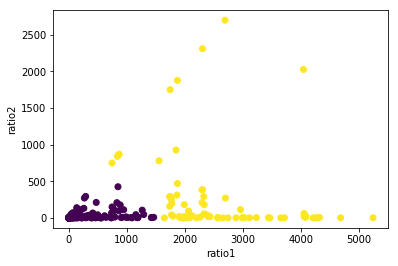

In [193]:
plt.scatter(np.array(casualities["ratio1"]), np.array(casualities["ratio2"]), c = clusters)
plt.xlabel("ratio1")
plt.ylabel("ratio2")
plt.show()

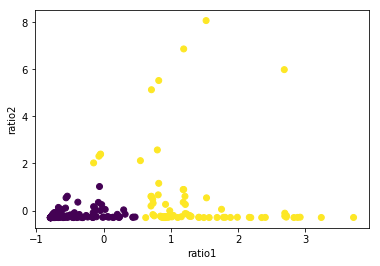

In [200]:
plt.scatter(X.T[0], X.T[1], c = clusters)
plt.xlabel("ratio1")
plt.ylabel("ratio2")
plt.show()

## Embeddings

In [392]:
data = pd.read_csv("data/train_test/train.csv")

In [394]:
log = Log.from_csv("data/train_test/train.csv", do_sort=True)

INFO:root:Reading...


In [432]:
case_lens = np.array([len(case) for case in log])

In [433]:
from scipy.stats import describe
describe(case_lens)

DescribeResult(nobs=3832, minmax=(2, 51), mean=6.674843423799582, variance=33.24063035918932, skewness=2.1228551510899836, kurtosis=6.197747860689827)

In [438]:
np.median(case_lens)

5.0

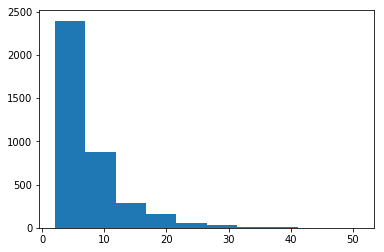

In [436]:
plt.hist(case_lens)
plt.show()

### word2vec

In [391]:
from gensim.models import Word2Vec

In [395]:
events = set()
for case in log:
    events = events | set(case)

In [501]:
clean_log = clean(log)

INFO:root:Cleaning...


In [502]:
clean_log.make_dicts()

In [503]:
letter2event = clean_log.letter2event

In [504]:
wv = Word2Vec(log, window=3, sg=0, compute_loss=True, hs=1, sorted_vocab=1, iter=100, size=300)

DEBUG:gensim.models.word2vec:Fast version of gensim.models.word2vec is being used
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 29 word types from a corpus of 22695 raw words and 3832 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:min_count=5 retains 29 unique words (100% of original 29, drops 0)
INFO:gensim.models.word2vec:min_count=5 leaves 22695 word corpus (100% of original 22695, drops 0)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 29 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 22 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 3581 word corpus (15.8% of prior 22695)
INFO:gensim.models.word2vec:estimated required memory for 29 words and 300 dimensions: 124700 bytes
INFO:gensim.models.word2vec:constructing a huffman tree fr

In [505]:
vocab = list(wv.wv.vocab)
embedding = [wv[name] for name in vocab]

In [401]:
casualities = pd.read_csv("data/casualities.csv")

In [402]:
events = np.unique(data["SIMPLIFIED EVENT"])
size = events.size
letters = [chr(i)  for i in range(ord("A"), ord("A") + 26)] + [chr(i) for i in range(ord("a"), ord("a") + size - 26)]
letter2event = dict(zip(letters, events))
event2letter = dict(zip(events, letters))

In [506]:
diffs = []
for pair in list(casualities["Pairs"]):
#     print(pair)
    events = list(pair)
    eventA = letter2event[events[0]]
    eventB = letter2event[events[1]]
    vectA = wv[eventA]
    vectB = wv[eventB]
    diff = vectA - vectB
    diffs.append(diff)
    

In [507]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(diffs)

In [508]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=1000, copy_x=True, tol=1e-17, verbose=0, n_init=100)
km.fit(np.array(diffs))
clusters = km.predict(np.array(diffs))

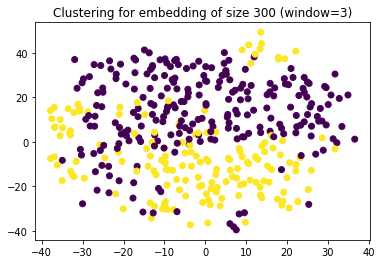

In [509]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title("Clustering for embedding of size 300 (window=3)")
plt.show()

### doc2vec

In [510]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [511]:
clean_log = clean(log)

INFO:root:Cleaning...


In [512]:
docs = []
for i, case in enumerate(clean_log):
    docs.append(TaggedDocument(case, [i]))

In [513]:
dv = Doc2Vec(docs, dm=0, size=100, window=3, min_count=0)

DEBUG:gensim.models.word2vec:Fast version of gensim.models.word2vec is being used
INFO:gensim.models.doc2vec:collecting all words and their counts
INFO:gensim.models.doc2vec:PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO:gensim.models.doc2vec:collected 29 word types and 3832 unique tags from a corpus of 3832 examples and 22695 words
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:min_count=0 retains 29 unique words (100% of original 29, drops 0)
INFO:gensim.models.word2vec:min_count=0 leaves 22695 word corpus (100% of original 22695, drops 0)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 29 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 22 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 3581 word corpus (15.8% of prior 22695)
INFO:gensim.models.word2vec:estimated required memory for 29 words and 100 dimensions: 1570500 bytes
INFO:gensim.models.word2vec:resetting l

In [514]:
diffs = np.array([dv.infer_vector(case) for case in clean_log])

In [515]:
X = TSNE(n_components=2).fit_transform(diffs)

In [516]:
from sklearn.cluster import KMeans
cluster_num = 10
km = KMeans(n_clusters=cluster_num, max_iter=1000, copy_x=True, tol=1e-17, verbose=0, n_init=100)
km.fit(np.array(diffs))
clusters = km.predict(np.array(diffs))

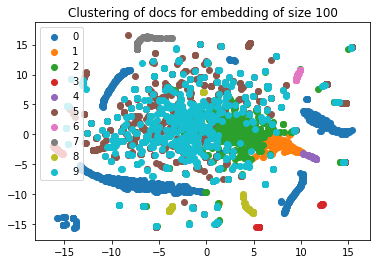

In [517]:
for i in range(cluster_num):
    points = X[clusters == i]
    plt.scatter(points[:,0], points[:,1], label=i)
plt.title("Clustering of docs for embedding of size 100")
plt.legend()
plt.show()

In [518]:
arrlog = np.array(log)

In [520]:
paths = np.unique(arrlog[clusters == 0])
for i in range(len(paths)):
    paths[i] = "".join([event2letter[event] for event in paths[i]])

for path in paths:
    print(path)

YX


In [388]:
wv.save("models/events_embeddings")

INFO:gensim.utils:saving Word2Vec object under models/events_embeddings, separately None
INFO:gensim.utils:not storing attribute syn0norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved models/events_embeddings


In [389]:
dv.save("models/cases_embeddings")

INFO:gensim.utils:saving Doc2Vec object under models/cases_embeddings, separately None
INFO:gensim.utils:not storing attribute syn0norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved models/cases_embeddings


In [497]:
pd.set_option('display.max_columns', 100)

In [498]:
data.head()

,Unnamed: 0,CASE,Unnamed: 0.1,Unnamed: 0.1.1,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,Document Type,Document Type Description,Document Category,Document Category Description,User ID,User Name,User Type,Vendor,Vendor Name,Material,Material Text,Material Description,Purchase Organisation,Purchase Organisation Description,Purchase Group,Quantity,Amount in Reporting Currency,Purchase Document,Purchase Document Line Item,Reference Document,Reference Document Line Item,Context,SELECT,START DATE,END DATE,CASE_EVENTATT,User Group,User Country,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,2000479285-10,3821,10741,Purchase order,Purchase order,Purchasing document,2014-10-13 05:30:16,2014-10-13 00:00:00,NaN,NaN,3000,Unknown,ZNB,NaN,F,Purchase order,CEYSSEOL,NaN,NaN,10175,Unknown,22998,BLA ISOPENTANE,BLA ISOPENTANE,3000,Unknown,N10,44000.0,48136.0,2000479285,10.0,2.000479e+09,10.0,Material type: Raw Materials (Intern nr); Mate...,2 - Purchase Order; 2 - Purchase Order,2014/10/13 05:30:16,2014/10/13 05:30:16,2000479285-10,NaN,NaN,NaN,NaN,NaN,NaN,21800,23849.2,21800,25070.0,44000.0,48136.0,NaN,NaN,NaN
1,1,2000479285-10,3822,10743,PO release - Approved,Approved,Document management - PO approval - status,2014-10-13 05:30:31,NaN,NaN,NaN,3000,Unknown,Not set,Not set,Not set,Purchase order,CEYSSEOL,NaN,NaN,10175,Unknown,22998,BLA ISOPENTANE,BLA ISOPENTANE,3000,Unknown,N10,NaN,NaN,2000479285,10.0,2.000479e+09,10.0,ZMM71:EKKO - FRGZU; -> X,8b - PO approval,2014/10/13 05:30:31,2014/10/13 05:30:31,2000479285-10,NaN,NaN,NaN,NaN,NaN,PO release - Approved-Not set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000479285-10,3823,10744,PO release - RELEASED (5% delta possible),RELEASED (5% delta possible),Document management - PO approval - indicator,2014-10-13 05:30:31,NaN,NaN,NaN,3000,Unknown,Not set,Not set,Not set,Purchase order,CEYSSEOL,NaN,NaN,10175,Unknown,22998,BLA ISOPENTANE,BLA ISOPENTANE,3000,Unknown,N10,NaN,NaN,2000479285,10.0,2.000479e+09,10.0,ZMM71:EKKO - FRGKE; X -> B,8a - PO approval,2014/10/13 05:30:31,2014/10/13 05:30:31,2000479285-10,NaN,NaN,NaN,NaN,NaN,PO release - RELEASED (5% delta possible)-Not set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000479285-10,9336,26384,Goods Reciept (Goods Receipt for Purchase Order),Goods Reciept,Delivery (in scope),2014-10-30 10:49:37,2014-10-30 10:49:37,2014-10-30 00:00:00,NaN,3000,Unknown,WE,Goods receipt,WE,Goods Receipt for Purchase Order,VNESTEGE,NaN,NaN,10175,Unknown,22998,BLA ISOPENTANE,BLA ISOPENTANE,Purchase organisation from 3000,Purchase organisation from 3000,Purchase group from 3000,21800.0,25070.0,2000479285,10.0,5.012026e+09,1.0,NaN,3a - Delivery (in scope),2014/10/30 10:49:37,2014/10/30 10:49:37,2000479285-10,NaN,NaN,NaN,NaN,NaN,Goods Reciept (Goods Receipt for Purchase Orde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000479285-10,10582,29952,Invoice Reciept (Logistics invoice),Invoice Reciept,Billing (in scope),2014-11-03 11:26:14,2014-11-03 11:26:14,2014-11-03 00:00:00,NaN,3000,Unknown,RE,Vendor invoice,RD,Logistics invoice,WF-BATCH,NaN,NaN,10175,Unknown,22998,BLA ISOPENTANE,BLA ISOPENTANE,Purchase organisation from 3000,Purchase organisation from 3000,Purchase group from 3000,21800.0,23849.2,2000479285,10.0,1.029982e+06,1.0,NaN,4a - Billing (in scope),2014/11/03 11:26:14,2014/11/03 11:26:14,2000479285-10,NaN,NaN,NaN,NaN,NaN,Invoice Reciept (Logistics invoice)-Vendor inv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
